The exploration should have a goal. As you explore the data, keep in mind that you want to answer which type of shows to produce and how to grow the business.
Ensure each recommendation is backed by data. The company is looking for data-driven insights, not personal opinions or anecdotes.
Assume that you are presenting your findings to business executives who have only a basic understanding of data science. Avoid unnecessary technical jargon.
Start by exploring a few questions: What type of content is available in different countries?
How has the number of movies released per year changed over the last 20-30 years?
Comparison of tv shows vs. movies.
What is the best time to launch a TV show?
Analysis of actors/directors of different types of shows/movies.
Does Netflix has more focus on TV Shows than movies in recent years
Understanding what content is available in different countries

1. Defining Problem Statement and Analysing basic metrics (10 Points)

2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary (10 Points)

3. Non-Graphical Analysis: Value counts and unique attributes ​​(10 Points)

4. Visual Analysis - Univariate, Bivariate after pre-processing of the data

Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country

4.1 For continuous variable(s): Distplot, countplot, histogram for univariate analysis (10 Points)

4.2 For categorical variable(s): Boxplot (10 Points)

4.3 For correlation: Heatmaps, Pairplots (10 Points)

5. Missing Value & Outlier check (Treatment optional) (10 Points)

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

# Netflix Analysis

*__Netlix, Inc__. is an American technology and media services provider and production
company headquartered in __Los Gatos, California__. Netlix was founded in 1997 by __Reed
Hastings__ and __Marc Randolph__ in Scotts Valley, California. The company’s primary business is its
subscription-based streaming service, which offers online streaming of a library of films and
television series, including those produced in-house.*

In [1]:
# Lets start by importing some basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the csv file into a variable

df = pd.read_csv('netflix.csv')

## 1. Defining Problem Statement and Analysing basic metrics

__Problem Statement__ : From the given data find out which type of shows to produce and how to grow the business.

In [4]:
# Lets see how the data looks like

df.head() # first 5 rows in the dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
df.shape
# There are 8807 rows and 12 columns in this dataset

(8807, 12)

In [6]:
df.info()
# All the columns except release_year is of object datatype, where release_year is of integer datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe() # default behaviour of describe is only for numeric datatype
# The data contains movies/TVshows which were released from 1925 to 2021

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [7]:
df.describe(include='O') # include='O' will describe the object datatype columns
# We can see there are 2 netflix types, with 8807 titles which were directed by 4528 directors.
# Movies/TVshows of 748 countries are listed in this dataset, we can also see that 2818 movies/tvshows were
# made in United States.

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s4238,Movie,Sick Note,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df.isnull().sum()/df.count() * 100

show_id          0.000000
type             0.000000
title            0.000000
director        42.669691
cast            10.335755
country         10.418756
date_added       0.113675
release_year     0.000000
rating           0.045439
duration         0.034075
listed_in        0.000000
description      0.000000
dtype: float64

In [9]:
df.type.unique()

array(['Movie', 'TV Show'], dtype=object)

In [10]:
tv = df[df['type']=='TV Show']
mov = df[df['type']=='Movie']

### show_id

In [11]:
df.show_id.nunique(), df.show_id.count()

(8807, 8807)

In [12]:
tv.show_id.nunique(),tv.show_id.count()

(2676, 2676)

In [13]:
mov.show_id.nunique(), mov.show_id.nunique()

(6131, 6131)

### type

In [14]:
df.type.value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [15]:
df.type.isnull().sum() # no null values

0

<AxesSubplot:xlabel='type', ylabel='count'>

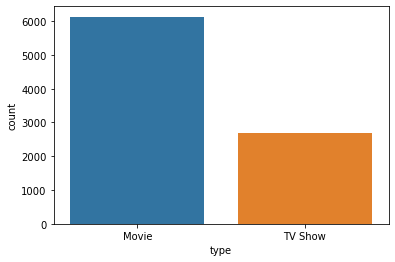

In [16]:
sns.countplot(x='type', data=df)

### title

In [17]:
df.title.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [18]:
df.title.nunique(), df.title.count()

(8807, 8807)

In [19]:
df.iloc[df.title.str.len().argmax()].title

'Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton'

In [20]:
df.iloc[df.title.str.len().argmin()].title

'H'

In [21]:
df[df.title.str.len()==1]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2069,s2070,TV Show,H,NaN,"Jamel Debbouze, Éric Judor, Ramzy Bedia, Cathe...",France,"September 1, 2020",2002,TV-MA,4 Seasons,"International TV Shows, TV Comedies","At a dysfunctional hospital in Paris, three bu..."
5958,s5959,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
7155,s7156,TV Show,K,NaN,"Daisuke Namikawa, Daisuke Ono, Mikako Komatsu,...",Japan,"December 1, 2016",2012,TV-MA,1 Season,"Anime Series, Crime TV Shows, International TV...",A young boy is wanted for a crime he has no re...
7687,s7688,Movie,P,Paul Spurrier,"Suangporn Jaturaphut, Opal, Dor Yodrak, Pisama...","United Kingdom, Thailand","May 31, 2019",2006,TV-MA,105 min,"Horror Movies, International Movies",An orphan girl taught magic by her sick grandm...


### director

In [22]:
df.director.head()

0    Kirsten Johnson
1                NaN
2    Julien Leclercq
3                NaN
4                NaN
Name: director, dtype: object

In [23]:
df.director.nunique(), df.director.isnull().sum(), df.director.count()

(4528, 2634, 6173)

In [24]:
df.director.value_counts()

Rajiv Chilaka                   19
Raúl Campos, Jan Suter          18
Suhas Kadav                     16
Marcus Raboy                    16
Jay Karas                       14
                                ..
Saandeep Patel                   1
John Patrick Shanley             1
Reinhard Klooss                  1
Denis Hennelly, Casey Suchan     1
Ah Loong                         1
Name: director, Length: 4528, dtype: int64

In [25]:
df.groupby('director').get_group(name='Rajiv Chilaka')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...
411,s412,Movie,Chhota Bheem And The Crown of Valhalla,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,To save the kingdom of Valhalla from invasion ...
412,s413,Movie,Chhota Bheem and the Incan Adventure,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,65 min,Children & Family Movies,"When Dholakpur’s princess is kidnapped, Bheem ..."
413,s414,Movie,Chhota Bheem and The ShiNobi Secret,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,After learning of a samurai village under thre...
414,s415,Movie,Chhota Bheem Aur Hanuman,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2012,TV-Y7,68 min,Children & Family Movies,When two evil entities kidnap a princess in a ...
415,s416,Movie,Chhota Bheem aur Krishna,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,"Centuries after the end of a conqueror's rule,..."


### cast

### country

### date_added

### release_year

### rating

### duration

### listed_in

### description